# 1-Librairies

In [1]:
# Standard
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset
import kagglehub

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler

# Division du dataset
from sklearn.model_selection import train_test_split

# Modèle de regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Métriques de performance
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error, r2_score

# Optimisation du modèle testé
from sklearn.model_selection import GridSearchCV

# Suppression des warnings
import warnings
warnings.filterwarnings("ignore")

c:\Users\mgraz\Documents\.vscode\Alyra\Projet Alyra\Block 3 - Machine Learning\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 2-DataFrame

In [2]:
path = kagglehub.dataset_download("miadul/brain-tumor-dataset")
df = pd.read_csv(f"{path}/brain_tumor_dataset.csv")

# 3- Analyse Exploratoire des Données (EDA)

In [3]:
# Visualisation du dataset
df.head()

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,4,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes


In [4]:
# Supression de colonne inutile
df=df.drop('Patient_ID',axis=1)
df.head()

,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes


In [5]:
# Information du dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  20000 non-null  int64  
 1   Gender               20000 non-null  object 
 2   Tumor_Type           20000 non-null  object 
 3   Tumor_Size           20000 non-null  float64
 4   Location             20000 non-null  object 
 5   Histology            20000 non-null  object 
 6   Stage                20000 non-null  object 
 7   Symptom_1            20000 non-null  object 
 8   Symptom_2            20000 non-null  object 
 9   Symptom_3            20000 non-null  object 
 10  Radiation_Treatment  20000 non-null  object 
 11  Surgery_Performed    20000 non-null  object 
 12  Chemotherapy         20000 non-null  object 
 13  Survival_Rate        20000 non-null  float64
 14  Tumor_Growth_Rate    20000 non-null  float64
 15  Family_History       20000 non-null 

In [6]:
# Verification si donnéées manquantes
df.isnull().sum()

Age                    0
Gender                 0
Tumor_Type             0
Tumor_Size             0
Location               0
Histology              0
Stage                  0
Symptom_1              0
Symptom_2              0
Symptom_3              0
Radiation_Treatment    0
Surgery_Performed      0
Chemotherapy           0
Survival_Rate          0
Tumor_Growth_Rate      0
Family_History         0
MRI_Result             0
Follow_Up_Required     0
dtype: int64

In [7]:
# Visualisation de la colonne "Taux de survie"
df['Survival_Rate']

0        51.312579
1        46.373273
2        47.072221
3        51.853634
4        54.708987
           ...    
19995    58.229662
19996    77.706856
19997    89.543803
19998    83.306781
19999    47.433468
Name: Survival_Rate, Length: 20000, dtype: float64

<Axes: title={'center': 'Taux de survie'}, xlabel='Count', ylabel='Survival_Rate'>

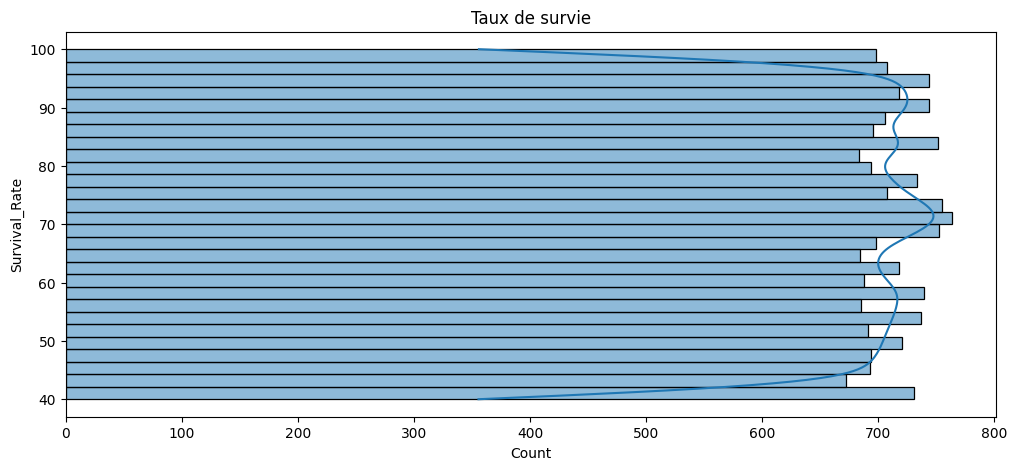

In [8]:
# Visualisation par histogramme
_, ax = plt.subplots( figsize=(12,5))

ax.set_title('Taux de survie')
sns.histplot(
    data=df,
    y='Survival_Rate',
    kde=True,
)

# 4-Preprocessing

## 4.2-Normalisation

### 4.2.1-LabelEncoder

In [9]:
# Initialiser le LabelEncoder
label_encoder = LabelEncoder()

# Convertir les données objet en numérique
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# Visualisation
df.head()

,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,73,1,1,5.375612,3,0,2,3,2,2,0,0,0,51.312579,0.111876,0,1,1
1,26,1,0,4.847098,2,1,1,0,0,1,1,1,1,46.373273,2.165736,1,1,1
2,31,1,0,5.588391,2,3,0,3,0,2,0,0,0,47.072221,1.884228,0,0,0
3,29,1,1,1.436600,3,2,3,3,2,0,1,0,1,51.853634,1.283342,1,0,0
4,54,0,0,2.417506,2,1,0,0,0,2,0,0,1,54.708987,2.069477,0,1,1


## 4.1-Dataset d'entrainement et de test 

In [10]:
# Définir les features et les target
X = df.drop('Survival_Rate', axis=1)
y = df['Survival_Rate']

# Diviser les données en sous-ensemble d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X.shape, y.shape

((20000, 17), (20000,))

## 4.3-StandardScaler les features

In [11]:
# Mise a l'echelle des features des 2 datasets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualisation
X_train_scaled.shape, X_test_scaled.shape

((16000, 17), (4000, 17))

## 4.4-Transformer les targets

In [12]:
# Initialser le Transformer
transformer = FunctionTransformer(np.log1p, validate=True)
y_train_trans = transformer.fit_transform(X_train_scaled)
y_test_trans = transformer.fit_transform(X_test_scaled)

# Visualisation
y_train_trans.shape, y_test_trans.shape

# Creation du DataFrame transfomé
# df_combine = pd.(X_train_scaled, y_train_trans)

# Visualisation
# df_combine.head()

((16000, 17), (4000, 17))

# 5-Choix du Modèle de Régression

## 5.1-Modèles de régression

In [13]:
models = {
    'LinearRegression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Regressor' : SVR(),
    'KNN': KNeighborsRegressor()
}

## 5.2-Entrainement des modèles entrainés

In [14]:
results = {}

for name, model in models.items():
        # Entrainement des modeles
        model.fit(X_train_scaled, y_train)

        # Prediction avec les données Test
        y_pred = model.predict(X_test_scaled)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred) * 100
        accuracy = 100 - mape

        results[name] = {
        'MAE': mae,
        'MSE': mse,
        'R2': r2,
        'Accuracy': accuracy
        }

        print(f"Performance de {name}:")
        print(f"Mean Absolute Error: {mae:.4f}")
        print(f"Mean Squared Error: {mse:.4f}")
        print(f"R^2 Score: {r2:.4f}")
        print(f"Accuracy: {accuracy:.2f}%\n")

Performance de LinearRegression:
Mean Absolute Error: 14.8062
Mean Squared Error: 295.0935
R^2 Score: -0.0003
Accuracy: 76.74%

Performance de Decision Tree:
Mean Absolute Error: 20.1982
Mean Squared Error: 610.6036
R^2 Score: -1.0699
Accuracy: 68.76%

Performance de Random Forest:
Mean Absolute Error: 14.9075
Mean Squared Error: 302.7931
R^2 Score: -0.0264
Accuracy: 76.59%

Performance de Support Vector Regressor:
Mean Absolute Error: 14.8386
Mean Squared Error: 298.2405
R^2 Score: -0.0110
Accuracy: 76.68%

Performance de KNN:
Mean Absolute Error: 15.9444
Mean Squared Error: 362.7874
R^2 Score: -0.2298
Accuracy: 75.07%



## 5.3-Visualisation de la performance des modèles

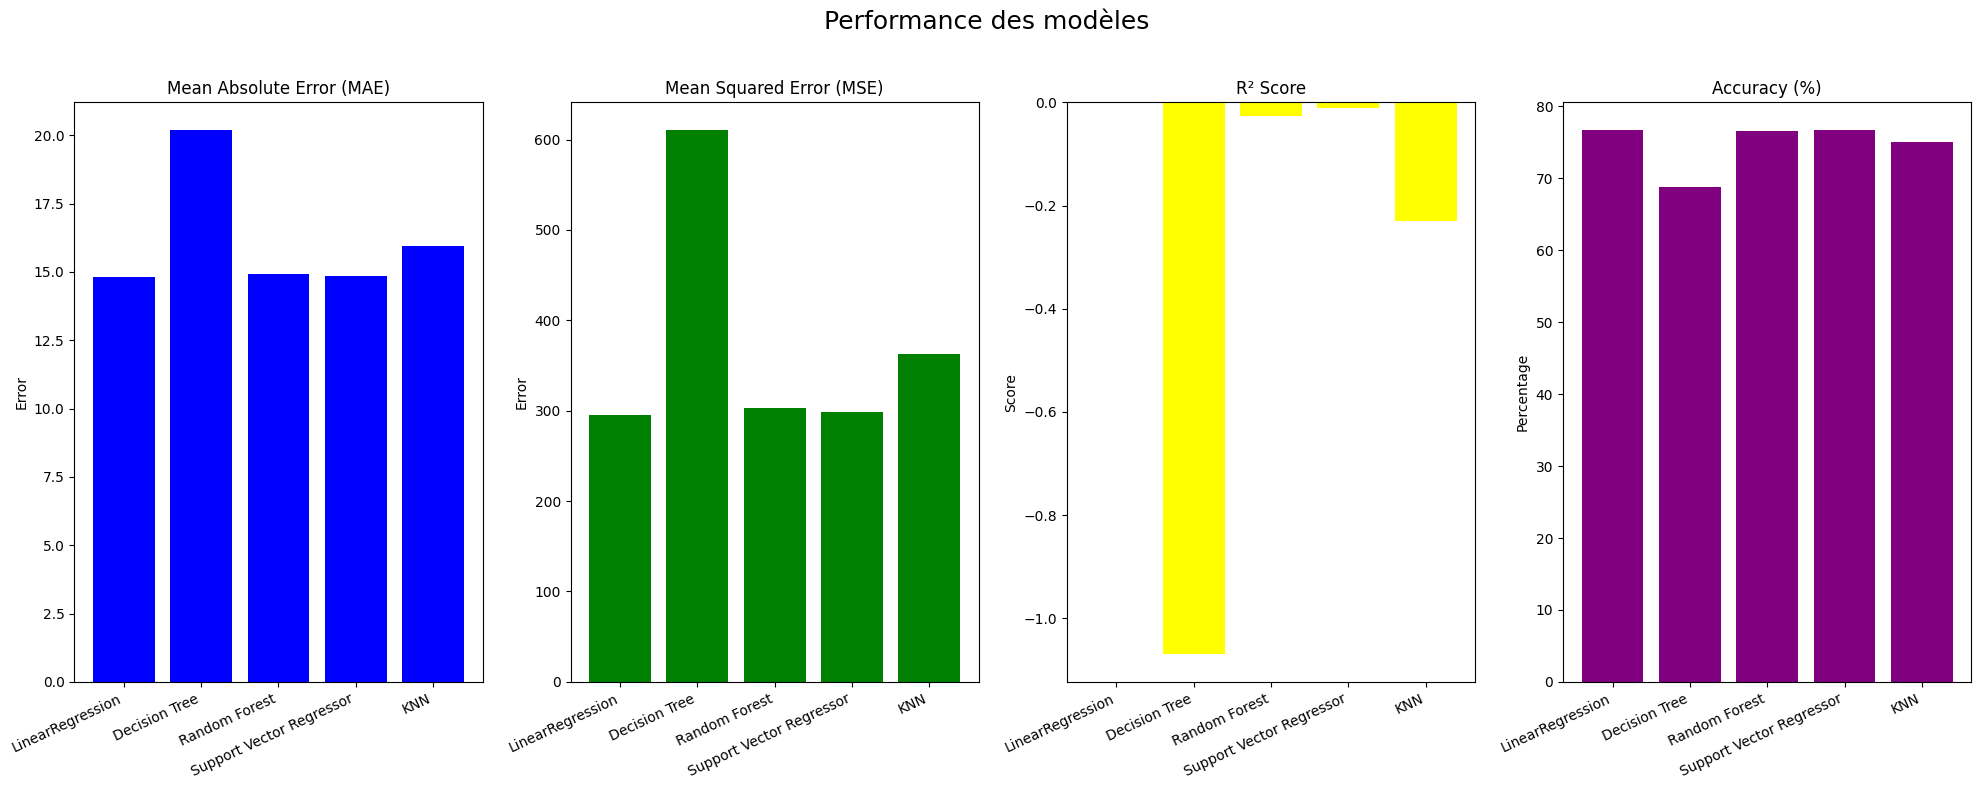

In [15]:
# Création des Graphiques Barplot
fig, ax = plt.subplots(1, 4, figsize=(20, 8))
fig.suptitle("Performance des modèles", fontsize=18)


# Recupération des resultats
model_names = list(results.keys())
mae_values = [results[name]['MAE'] for name in model_names]
mse_values = [results[name]['MSE'] for name in model_names]
r2_values = [results[name]['R2'] for name in model_names]
accuracy_values = [results[name]['Accuracy'] for name in model_names]

# MAE
ax[0].bar(model_names, mae_values, color="blue")
ax[0].set_title("Mean Absolute Error (MAE)")
ax[0].set_ylabel("Error")
ax[0].set_xticklabels(model_names, rotation=25, ha="right")

# MSE
ax[1].bar(model_names, mse_values, color="green")
ax[1].set_title("Mean Squared Error (MSE)")
ax[1].set_ylabel("Error")
ax[1].set_xticklabels(model_names, rotation=25, ha="right")

# R^2 Score
ax[2].bar(model_names, r2_values, color="yellow")
ax[2].set_title("R² Score")
ax[2].set_ylabel("Score")
ax[2].set_xticklabels(model_names, rotation=25, ha="right")

# Accuracy
ax[3].bar(model_names, accuracy_values, color="purple")
ax[3].set_title("Accuracy (%)")
ax[3].set_ylabel("Percentage")
ax[3].set_xticklabels(model_names, rotation=25, ha="right")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 6 -Optimisation des modèles par Gridsearch

## 6.1- Visualisation des parametres de chaque modèle

In [16]:
# Récupération des paramètres pour chaque modèle
for model_name, model in models.items():
    print(f"Paramètres de {model_name}:")
    print(model.get_params())
    print("-" * 50)

Paramètres de LinearRegression:
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False, 'tol': 1e-06}
--------------------------------------------------
Paramètres de Decision Tree:
{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}
--------------------------------------------------
Paramètres de Random Forest:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
----------------------------------

## 6.2-Grille de valeurs des paramètres pour chaque modèle

In [17]:
params_grid = {
    "LinearRegression": {'copy_X': [True,False], 'fit_intercept': [True,False], 'positive': [True,False]},
    "Decision Tree": {'max_depth': [3, 5, 10, None],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]},
    "Random Forest": {"n_estimators": [10, 50, 100], "max_depth": [None, 10, 20]},
    "Support Vector Regressor": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    "KNN": {'n_neighbors': [3, 5, 10, 20],'weights': ['uniform', 'distance'],'p': [1, 2]}
}

## 6.3- Entrainement des modèles optimisés 

In [18]:
#Entrainement des modèles optimisés
results_grid= {}

for name, model in models.items():
    print(f"Optimisation pour {name}...")
    grid_search = GridSearchCV(
        estimator = model,
        param_grid=params_grid[name],
        cv=5,
        verbose=1,
        n_jobs=-1
        )

    grid_search.fit(X_train_scaled, y_train)

    # Prédiction des modèles optimisés
    y_pred_grid = grid_search.predict(X_test_scaled)
    mae_grid = mean_absolute_error(y_test, y_pred_grid)
    mse_grid = mean_squared_error(y_test, y_pred_grid)
    r2_grid = r2_score(y_test, y_pred_grid)
    mape_grid = mean_absolute_percentage_error(y_test, y_pred_grid) * 100
    accuracy_grid = 100 - mape_grid

    results_grid[name] = {
    'MAE': mae_grid,
    'MSE': mse_grid,
    'R2': r2_grid,
    'Accuracy': accuracy_grid
    }
    
    # Visualisation  des modèles optimisés
    print(f"Performance de {name} (Optimisé):")
    print(f"Mean Absolute Error: {mae_grid:.4f}")
    print(f"Mean Squared Error: {mse_grid:.4f}")
    print(f"R^2 Score: {r2_grid:.4f}")
    print(f"Accuracy: {accuracy_grid:.2f}%\n")

Optimisation pour LinearRegression...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Performance de LinearRegression (Optimisé):
Mean Absolute Error: 14.8124
Mean Squared Error: 295.2129
R^2 Score: -0.0007
Accuracy: 76.73%

Optimisation pour Decision Tree...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Performance de Decision Tree (Optimisé):
Mean Absolute Error: 14.8220
Mean Squared Error: 296.0204
R^2 Score: -0.0035
Accuracy: 76.71%

Optimisation pour Random Forest...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Performance de Random Forest (Optimisé):
Mean Absolute Error: 14.8206
Mean Squared Error: 296.2540
R^2 Score: -0.0043
Accuracy: 76.72%

Optimisation pour Support Vector Regressor...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Performance de Support Vector Regressor (Optimisé):
Mean Absolute Error: 14.8066
Mean Squared Error: 295.5218
R^2 Score: -0.0018
Accuracy: 76.73%

Optimisation pour KNN...
Fitting 5 folds for e

## 6.4-Visualisation de la performance des modèles optimisés

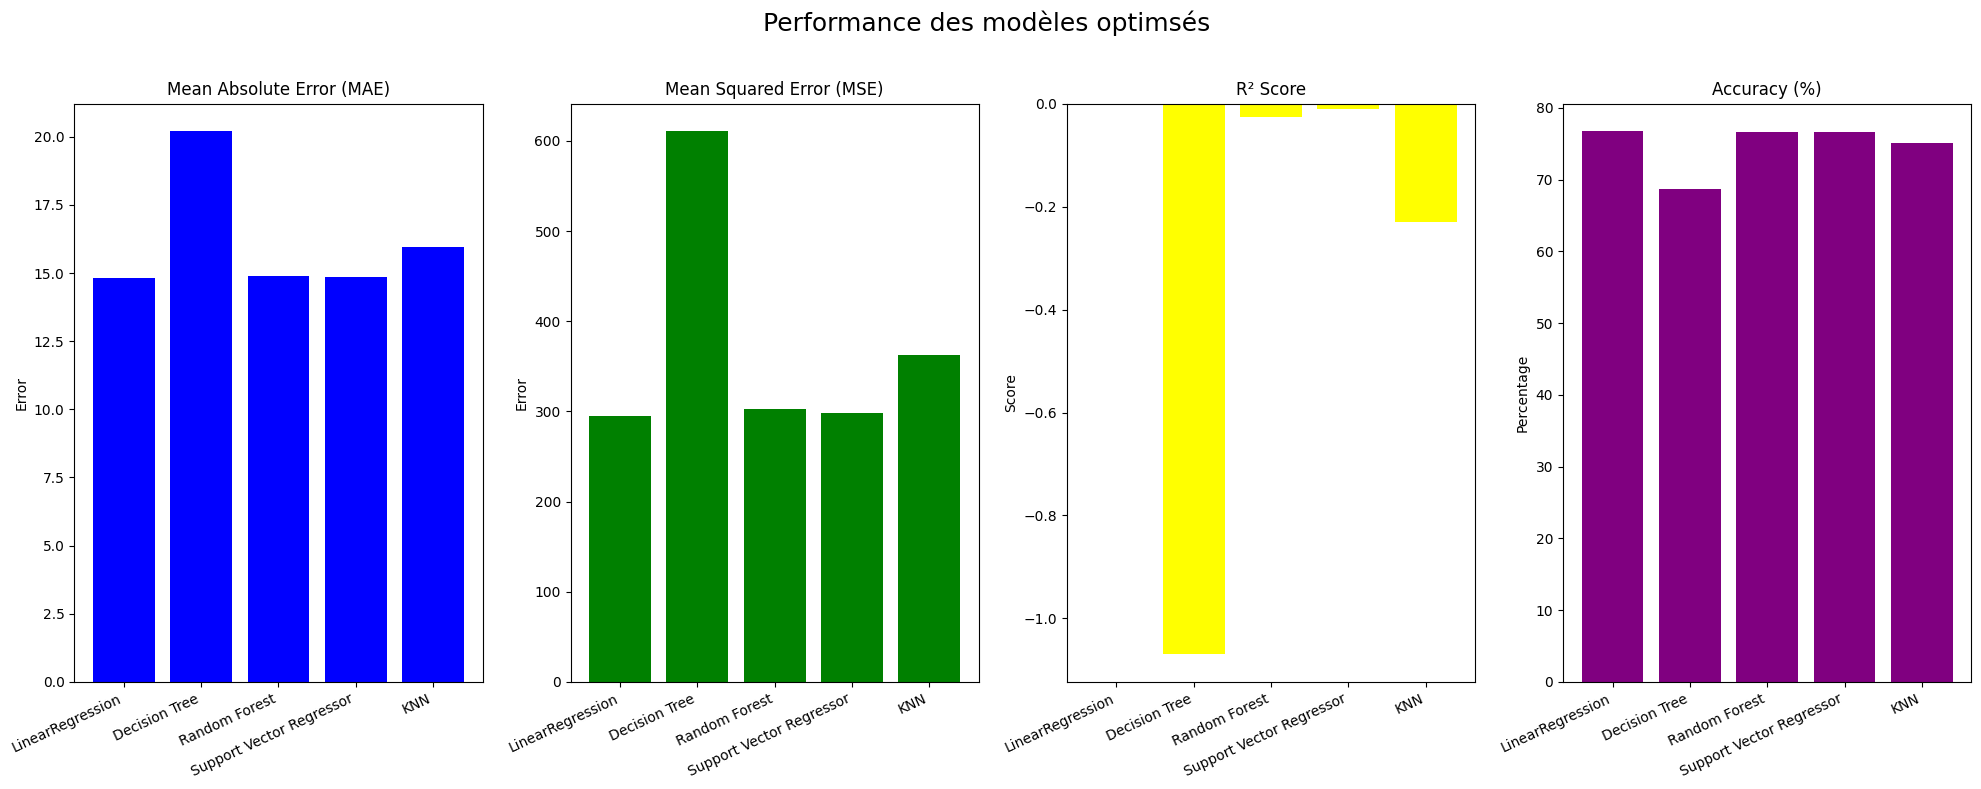

In [19]:
# Création des Graphiques Barplot
fig, ax = plt.subplots(1, 4, figsize=(20, 8))
fig.suptitle("Performance des modèles optimsés", fontsize=18)

# Recupération des resultats
model_names = list(results.keys())
mae_grid_values = [results[name]['MAE'] for name in model_names]
mse_grid_values = [results[name]['MSE'] for name in model_names]
r2_grid_values = [results[name]['R2'] for name in model_names]
accuracy_grid_values = [results[name]['Accuracy'] for name in model_names]

# MAE
ax[0].bar(model_names, mae_grid_values, color="blue")
ax[0].set_title("Mean Absolute Error (MAE)")
ax[0].set_ylabel("Error")
ax[0].set_xticklabels(model_names, rotation=25, ha="right")

# MSE
ax[1].bar(model_names, mse_grid_values, color="green")
ax[1].set_title("Mean Squared Error (MSE)")
ax[1].set_ylabel("Error")
ax[1].set_xticklabels(model_names, rotation=25, ha="right")

# R^2 Score
ax[2].bar(model_names, r2_grid_values, color="yellow")
ax[2].set_title("R² Score")
ax[2].set_ylabel("Score")
ax[2].set_xticklabels(model_names, rotation=25, ha="right")

# Accuracy
ax[3].bar(model_names, accuracy_grid_values, color="purple")
ax[3].set_title("Accuracy (%)")
ax[3].set_ylabel("Percentage")
ax[3].set_xticklabels(model_names, rotation=25, ha="right")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 7-Conclusion

In [20]:
# Meilleur modèle sans optimisation
best_model_name = max(results, key=lambda k: results[k]['R2'])
best_model = results[best_model_name]

print(f"Meilleur modèle avant optimisation: {best_model_name}")
print(f"MAE: {best_model['MAE']:.4f}")
print(f"MSE: {best_model['MSE']:.4f}")
print(f"R2: {best_model['R2']:.4f}")
print(f"Accuracy: {best_model['Accuracy']:.2f}%")

# Meilleur modèle apres optimisation avec GridSearch
best_model_name_grid = max(results_grid, key=lambda k: results_grid[k]['R2'])
best_model_grid = results_grid[best_model_name_grid]

print(f"Meilleur modèle apres optimisation: {best_model_name_grid}")
print(f"MAE: {best_model_grid['MAE']:.4f}")
print(f"MSE: {best_model_grid['MSE']:.4f}")
print(f"R2: {best_model_grid['R2']:.4f}")
print(f"Accuracy: {best_model_grid['Accuracy']:.2f}%")

Meilleur modèle avant optimisation: LinearRegression
MAE: 14.8062
MSE: 295.0935
R2: -0.0003
Accuracy: 76.74%
Meilleur modèle apres optimisation: LinearRegression
MAE: 14.8124
MSE: 295.2129
R2: -0.0007
Accuracy: 76.73%
